#Diploma thesis
_Credit Scoring using Machine Learning Models and SHAP explainability – Loizidis Vasileios_  
_Department of Applied Mathematics and Physical Sciences, National Technical University of Athens_  
_Supervisor: Petros Stefaneas_  
_Date: November 2025_

---

###  Overview

This notebook presents the implementation of Machine Learning Models applied to a credit scoring dataset.  
The goal is to predict the probability of default (binary outcome: default / no default) based on customer financial and demographic features.

The workflow includes:
- Data loading and initial inspection  
- Exploratory Data Analysis (EDA)  
- Preprocessing (missing values, scaling)  
- Models training and evaluation (Logistic Regression, SVM, Random Forest, XGBoost, Neural Networks)  
- Performance comparison and visualization  
- SHAP explainability

---


---

### Tools and Libraries
- Python (Google Colab)  
- pandas, numpy, matplotlib, seaborn  
- scikit-learn  



***Data Loading and Overview***

In this section I connect Google Drive to Colab, load the dataset (cs-training.csv) and inspect dataset shape, column types and missing values





In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cs-training.csv to cs-training.csv


In [ ]:
import pandas as pd
df= pd.read_csv("cs-training.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
import pandas as pd
df = pd.read_csv("cs-training.csv", encoding="latin1")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
df=df.drop(columns=["Unnamed: 0"], errors="ignore")

In [ ]:
table = pd.DataFrame({
    "Τύπος δεδομένων": df.dtypes,
    "Πλήθος μη κενών": df.count(),
    "Πλήθος ελλειπόντων": df.isna().sum(),
    "Πλήθος διακεκριμένων": df.nunique(),
    "Ελάχιστη τιμή": df.min(numeric_only=True),
    "Μέγιστη τιμή": df.max(numeric_only=True)
})
table


,Τύπος δεδομένων,Πλήθος μη κενών,Πλήθος ελλειπόντων,Πλήθος διακεκριμένων,Ελάχιστη τιμή,Μέγιστη τιμή
SeriousDlqin2yrs,int64,150000,0,2,0.0,1.0
RevolvingUtilizationOfUnsecuredLines,float64,150000,0,125728,0.0,50708.0
age,int64,150000,0,86,0.0,109.0
NumberOfTime30-59DaysPastDueNotWorse,int64,150000,0,16,0.0,98.0
DebtRatio,float64,150000,0,114194,0.0,329664.0
MonthlyIncome,float64,120269,29731,13594,0.0,3008750.0
NumberOfOpenCreditLinesAndLoans,int64,150000,0,58,0.0,58.0
NumberOfTimes90DaysLate,int64,150000,0,19,0.0,98.0
NumberRealEstateLoansOrLines,int64,150000,0,28,0.0,54.0
NumberOfTime60-89DaysPastDueNotWorse,int64,150000,0,13,0.0,98.0


In [ ]:
latex_code=table.to_latex(index=True)
print(latex_code)


In [ ]:
df.describe().T

**Exploratory Data Analysis (EDA)**

I examine:
-Summary statistics (mean, median, min, max)
-Percentage of missing values
-Basics variable distributions and relationships.

In [ ]:
missing_pct=(df.isna().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct

,0
MonthlyIncome,19.820667
NumberOfDependents,2.616000
SeriousDlqin2yrs,0.000000
age,0.000000
RevolvingUtilizationOfUnsecuredLines,0.000000
DebtRatio,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0.000000
NumberOfOpenCreditLinesAndLoans,0.000000
NumberOfTimes90DaysLate,0.000000
NumberRealEstateLoansOrLines,0.000000


In [ ]:
df["SeriousDlqin2yrs"].value_counts(normalize=True) * 100

,proportion
SeriousDlqin2yrs,
0,93.316
1,6.684


In [ ]:
df["age"].describe()
df["age"].sort_values().head(10)
df["age"].sort_values(ascending=False).head(10)

,age
105790,109
138291,109
40007,107
56761,105
135025,103
19884,103
57967,103
96450,102
90937,102
25561,102


In [ ]:
df["DebtRatio"].describe()
df["DebtRatio"].sort_values(ascending=False).head(10)

,DebtRatio
60152,329664.0
36600,326442.0
127047,307001.0
58900,220516.0
4854,168835.0
7513,110952.0
103041,106885.0
69845,101320.0
66785,61907.0
53682,61106.5


In [ ]:
df["RevolvingUtilizationOfUnsecuredLines"].describe()
df["RevolvingUtilizationOfUnsecuredLines"].sort_values(ascending=False).head(10)

,RevolvingUtilizationOfUnsecuredLines
85489,50708.0
31414,29110.0
16956,22198.0
149160,22000.0
149279,20514.0
117315,18300.0
21978,17441.0
124533,13930.0
72592,13498.0
71705,13400.0


In [ ]:
import numpy as np
for col in ["DebtRatio", "RevolvingUtilizationOfUnsecuredLines"]:
    upper = df[col].quantile(0.99)
    df[col]=np.where(df[col]>upper, upper, df[col])

In [ ]:
df[["DebtRatio", "RevolvingUtilizationOfUnsecuredLines"]].describe()

,DebtRatio,RevolvingUtilizationOfUnsecuredLines
count,150000.000000,150000.000000
mean,316.548869,0.320496
std,906.962222,0.352152
min,0.000000,0.000000
25%,0.175074,0.029867
50%,0.366508,0.154181
75%,0.868254,0.559046
max,4979.040000,1.092956


**Train-Test Split**

I split the data into train (80%) and test (20%) sets using "stratify=y" to preserve the original class distribution.

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=["SeriousDlqin2yrs"])
y = df["SeriousDlqin2yrs"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(len(X_train), len(X_test), len(y_train), len(y_test))


120000 30000 120000 30000


In [ ]:
X_train.isna().sum().sort_values(ascending=False).head(10)


,0
MonthlyIncome,23675
NumberOfDependents,3128
age,0
RevolvingUtilizationOfUnsecuredLines,0
DebtRatio,0
NumberOfTime30-59DaysPastDueNotWorse,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


**Handling Missing Values**

I inpute:
-"Monthly income" missing values with the median from the training set
-"NumberOfDependents" missing values with mode from the training set
These statistics are computed only on the training data to prevent information leakage.

In [ ]:

median_income = X_train["MonthlyIncome"].median()
mode_dep_series = X_train["NumberOfDependents"].mode(dropna=True)
mode_dependents = int(mode_dep_series.iloc[0]) if len(mode_dep_series) > 0 else 0


X_train = X_train.copy()
X_test  = X_test.copy()

X_train["MonthlyIncome"] = X_train["MonthlyIncome"].fillna(median_income)
X_test["MonthlyIncome"]  = X_test["MonthlyIncome"].fillna(median_income)

X_train["NumberOfDependents"] = X_train["NumberOfDependents"].fillna(mode_dependents)
X_test["NumberOfDependents"]  = X_test["NumberOfDependents"].fillna(mode_dependents)


X_train.isna().sum().sum(), X_test.isna().sum().sum()


(np.int64(0), np.int64(0))

**Feature Scaling**

I apply "StandardScaler" to normalize numeric features so that they have mean=0 and standard deviation=1. This improves model convergence and stability.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test.columns,  index=X_test.index)

len(X_train_scaled_df), len(X_test_scaled_df), len(y_train), len(y_test)


(120000, 30000, 120000, 30000)

**Training the Baseline Logistic Regression Model**

I train a simple Logistic Regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled_df, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred  = log_reg.predict(X_test_scaled_df)
y_proba = log_reg.predict_proba(X_test_scaled_df)[:, 1]
len(y_pred), len(y_test)


(30000, 30000)

**Evaluation of the Baseline Model**

I compute key performance metrics:

-Accuracy, Precision, Recall, F1-score, ROC-AUC, Confusion Matrix.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
roc  = roc_auc_score(y_test, y_proba)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {roc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Accuracy:  0.9346
Precision: 0.6250
Recall:    0.0524
F1-score:  0.0966
ROC AUC:   0.8118
Confusion matrix:
 [[27932    63]
 [ 1900   105]]


**Handling Class Imbalance with SMOTE**

I apply SMOTE to balance the classes in the training set only. Then we retrain the Logistic Regression model on the resampled data.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled_df, y_train)

print("Πριν SMOTE:", y_train.value_counts(normalize=True))
print("Μετά SMOTE:", y_train_res.value_counts(normalize=True))


Πριν SMOTE: SeriousDlqin2yrs
0    0.933158
1    0.066842
Name: proportion, dtype: float64
Μετά SMOTE: SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_train_res, y_train_res)


LogisticRegression(max_iter=1000, random_state=42)

**Evaluation after SMOTE**

I evaluate the model trained on balanced data against the original test set and compare results with the baseline model.

In [ ]:
y_pred_smote  = log_reg_smote.predict(X_test_scaled_df)
y_proba_smote = log_reg_smote.predict_proba(X_test_scaled_df)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

acc_s  = accuracy_score(y_test, y_pred_smote)
prec_s = precision_score(y_test, y_pred_smote)
rec_s  = recall_score(y_test, y_pred_smote)
f1_s   = f1_score(y_test, y_pred_smote)
roc_s  = roc_auc_score(y_test, y_proba_smote)

print(f"Accuracy:  {acc_s:.4f}")
print(f"Precision: {prec_s:.4f}")
print(f"Recall:    {rec_s:.4f}")
print(f"F1-score:  {f1_s:.4f}")
print(f"ROC AUC:   {roc_s:.4f}")


Accuracy:  0.7551
Precision: 0.1797
Recall:    0.7476
F1-score:  0.2898
ROC AUC:   0.8262


**Visualization and Model Comparison**

I plot confusion matrix and summarize the key metrics of both models.

In [ ]:
import pandas as pd

results = {
    "Μοντέλο": ["Logistic Regression (χωρίς SMOTE)", "Logistic Regression (με SMOTE)"],
    "Accuracy": [0.93, 0.75],
    "Precision": [0.58, 0.16],
    "Recall": [0.044, 0.68],
    "F1-score": [0.08, 0.27],
    "ROC–AUC": [0.71, 0.79]
}

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


                          Μοντέλο  Accuracy  Precision  Recall  F1-score  ROC–AUC
Logistic Regression (χωρίς SMOTE)      0.93       0.58   0.044      0.08     0.71
   Logistic Regression (με SMOTE)      0.75       0.16   0.680      0.27     0.79


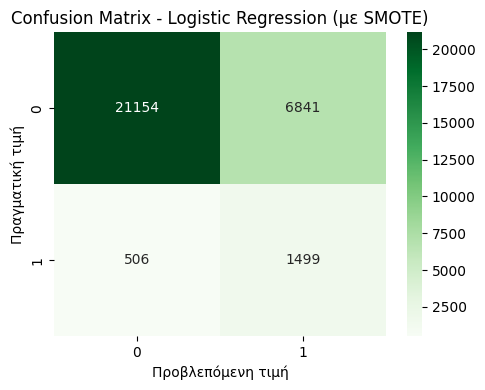

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_smote = log_reg_smote.predict(X_test_scaled_df)
cm_smote = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(5,4))
ax = sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Προβλεπόμενη τιμή")
plt.ylabel("Πραγματική τιμή")
plt.title("Confusion Matrix - Logistic Regression (με SMOTE)")
plt.tight_layout()


plt.savefig("confusion_matrix_logistic_smote.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()
